In [1]:
from matplotlib.pyplot import grid
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
import xgboost as xg
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xg
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

## Reading Data

In [245]:
Data = pd.read_csv('train.csv')
TestData = pd.read_csv('test.csv')

## PreProcessing

In [3]:
print(Data.isnull().sum())

In [4]:
print(TestData.isnull().sum())

In [5]:

plt.figure(figsize=(30, 10))
sns.countplot(Data['Age'])
plt.show()


"\nplt.figure(figsize=(30, 10))\nsns.countplot(Data['Age'])\nplt.show()\n"

In [246]:
TestData['Family_Size'] = Data['Family_Size'].fillna(value=Data['Family_Size'].median())
TestData['Work_Experience'] = Data['Work_Experience'].fillna(value=Data['Work_Experience'].median())
TestData['Ever_Married'] = Data['Ever_Married'].fillna(method='ffill')
TestData['Var_1'] = Data['Var_1'].fillna(method='ffill')
TestData['Graduated'] = Data['Graduated'].fillna(method='ffill')
TestData['Profession'] = Data['Profession'].fillna(method='ffill')



In [247]:
Data = Data.dropna()

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


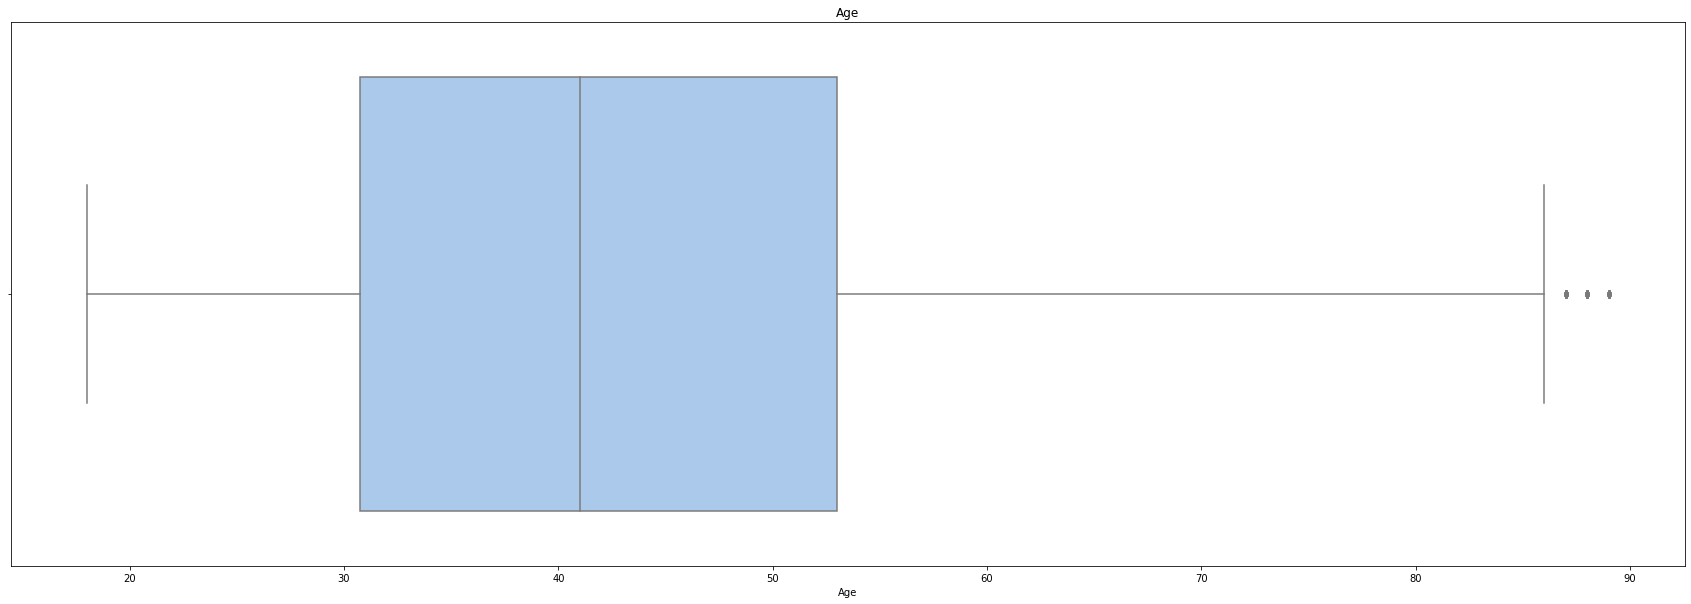

In [241]:
"""
plt.figure(figsize=(30, 10))
sns.boxplot(Data['Age'],palette='pastel').set_title('Age')
plt.show()
"""

In [10]:
#print(Data['Profession'].unique())
#print(TestData['Profession'].unique())

In [248]:

Encoder = LabelEncoder()

Data['Gender'] = Encoder.fit_transform(Data['Gender'])
TestData['Gender'] = Encoder.fit_transform(TestData['Gender'])
Data['Ever_Married'] = Encoder.fit_transform(Data['Ever_Married'])
TestData['Ever_Married'] = Encoder.fit_transform(TestData['Ever_Married'])
Data['Graduated'] = Encoder.fit_transform(Data['Graduated'])
TestData['Graduated'] = Encoder.fit_transform(TestData['Graduated'])
Data['Age'] = Encoder.fit_transform(Data['Age'])
TestData['Age'] = Encoder.fit_transform(TestData['Age'])
Data['Var_1'] = Encoder.fit_transform(Data['Var_1'])
TestData['Var_1'] = Encoder.fit_transform(TestData['Var_1'])
Data['Spending_Score'] = Encoder.fit_transform(Data['Spending_Score'])
TestData['Spending_Score'] = Encoder.fit_transform(TestData['Spending_Score'])
Data['Profession'] = Encoder.fit_transform(Data['Profession'])
TestData['Profession'] = Encoder.fit_transform(TestData['Profession'])
Data['Segmentation'] = Encoder.fit_transform(Data['Segmentation'])


In [15]:
"""
plt.scatter(Data['Age'], Data['Segmentation'])
plt.show()
"""

"\nplt.scatter(Data['Age'], Data['Segmentation'])\nplt.show()\n"

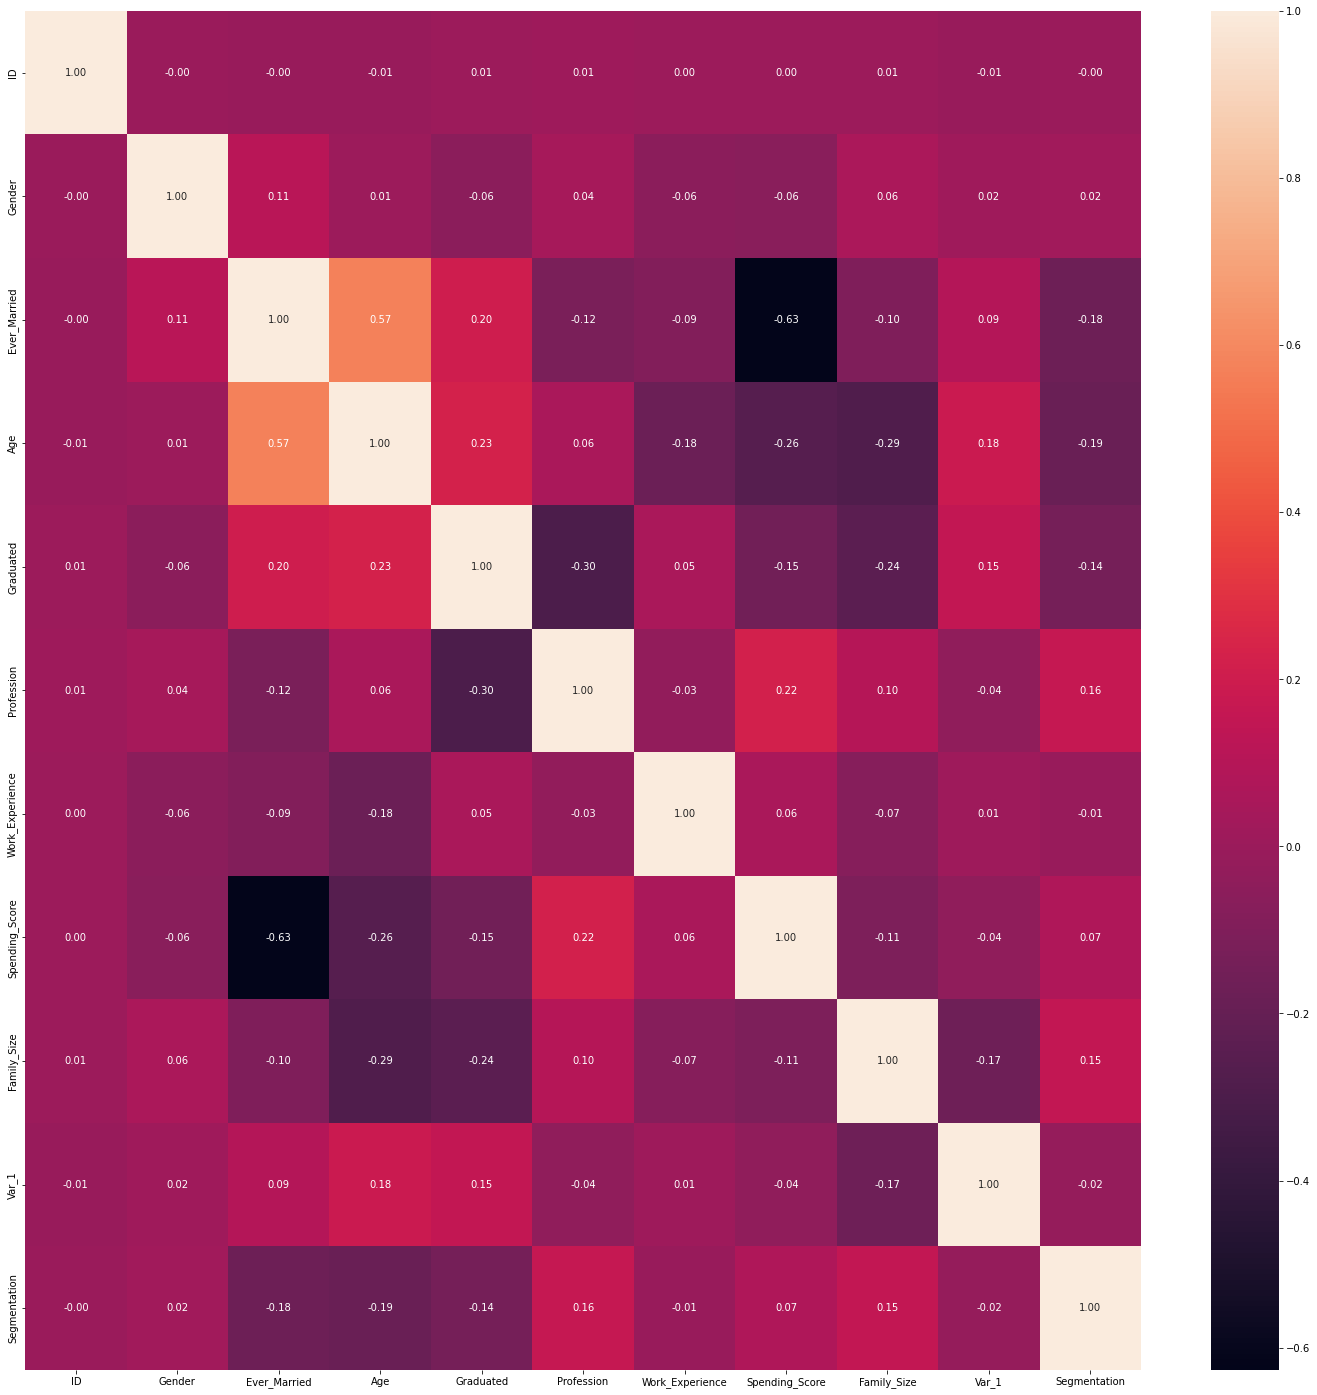

In [249]:

fig = plt.figure(figsize=(25,25))
dataplot = sns.heatmap(Data.corr(), annot=True, fmt = '.2f')
plt.show()


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


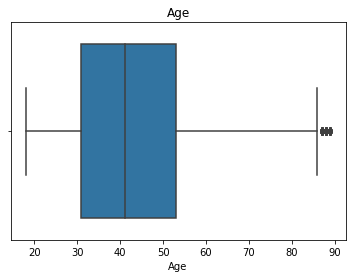

In [86]:

sns.boxplot(Data['Age']).set_title('Age')
plt.show()

In [235]:
XTrain = Data.drop(['ID', 'Segmentation'], axis = 1)
YTrain = Data['Segmentation']
XTest = TestData.drop(['ID', 'Segmentation'], axis = 1)
#XTrain = np.array(XTrain)
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)

(5928, 23)
(5928,)
(3530, 23)


In [236]:
Norm = MinMaxScaler().fit(XTrain)
XTrain = Norm.transform(XTrain)
XTest = Norm.transform(XTest)

In [194]:
XTrain,XVal,YTrain,YVal=train_test_split(XTrain,YTrain,test_size=0.3,random_state=12, shuffle=True)

In [238]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree=2).fit(XTrain)
X_Train = polyreg.transform(XTrain)
X_Test = polyreg.transform(XTest)
X_Val = polyreg.transform(XVal)


In [239]:
from catboost import CatBoostClassifier
Model5 = CatBoostClassifier(iterations=870,learning_rate=0.01)
Model5.fit(X_Train, YTrain, eval_set=(X_Val, YVal), plot=True)
YNew = Model5.predict(X_Val)
print(accuracy_score(YVal, YNew))

0:	learn: 1.3831852	total: 114ms	remaining: 1m 39s
1:	learn: 1.3800168	total: 207ms	remaining: 1m 29s
2:	learn: 1.3769794	total: 289ms	remaining: 1m 23s
3:	learn: 1.3738563	total: 370ms	remaining: 1m 20s
4:	learn: 1.3707028	total: 480ms	remaining: 1m 23s
5:	learn: 1.3673495	total: 563ms	remaining: 1m 21s
6:	learn: 1.3644575	total: 654ms	remaining: 1m 20s
7:	learn: 1.3615894	total: 799ms	remaining: 1m 26s
8:	learn: 1.3586255	total: 905ms	remaining: 1m 26s
9:	learn: 1.3559528	total: 998ms	remaining: 1m 25s
10:	learn: 1.3530430	total: 1.08s	remaining: 1m 24s
11:	learn: 1.3502765	total: 1.16s	remaining: 1m 22s
12:	learn: 1.3476769	total: 1.26s	remaining: 1m 22s
13:	learn: 1.3450828	total: 1.35s	remaining: 1m 22s
14:	learn: 1.3422511	total: 1.44s	remaining: 1m 22s
15:	learn: 1.3395656	total: 1.52s	remaining: 1m 20s
16:	learn: 1.3372576	total: 1.61s	remaining: 1m 20s
17:	learn: 1.3346716	total: 1.7s	remaining: 1m 20s
18:	learn: 1.3323799	total: 1.78s	remaining: 1m 19s
19:	learn: 1.3298423	to

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


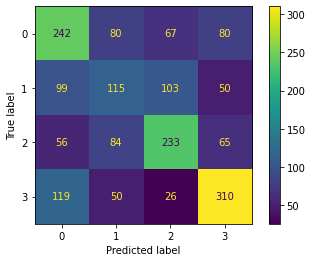

In [77]:
plot_confusion_matrix(Model5, XVal, YVal)

0:	learn: 1.3830711	total: 3.81ms	remaining: 3.01s
1:	learn: 1.3798287	total: 8.36ms	remaining: 3.3s
2:	learn: 1.3766495	total: 12.5ms	remaining: 3.29s
3:	learn: 1.3739570	total: 16.2ms	remaining: 3.19s
4:	learn: 1.3712242	total: 19.9ms	remaining: 3.13s
5:	learn: 1.3683703	total: 24.3ms	remaining: 3.18s
6:	learn: 1.3653927	total: 28.2ms	remaining: 3.16s
7:	learn: 1.3627470	total: 31.8ms	remaining: 3.11s
8:	learn: 1.3600265	total: 35.9ms	remaining: 3.12s
9:	learn: 1.3574665	total: 39.7ms	remaining: 3.1s
10:	learn: 1.3551152	total: 43.8ms	remaining: 3.11s
11:	learn: 1.3526704	total: 47.8ms	remaining: 3.1s
12:	learn: 1.3501529	total: 51.8ms	remaining: 3.1s
13:	learn: 1.3476810	total: 58.7ms	remaining: 3.26s
14:	learn: 1.3454544	total: 63ms	remaining: 3.26s
15:	learn: 1.3430219	total: 67.4ms	remaining: 3.26s
16:	learn: 1.3406440	total: 73.2ms	remaining: 3.33s
17:	learn: 1.3383459	total: 79.3ms	remaining: 3.41s
18:	learn: 1.3362387	total: 84.6ms	remaining: 3.44s
19:	learn: 1.3339960	total: 

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


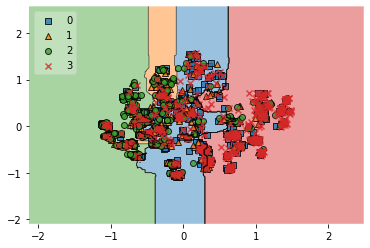

In [78]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XVal)
Model5.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model5, legend=2)
plt.show()

##  Logistic Regression

In [34]:
Model = LogisticRegression(multi_class='ovr')
Model.fit(X_Train, YTrain)

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression(multi_class='ovr')

In [35]:
YNew = Model.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.49128724002248453


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


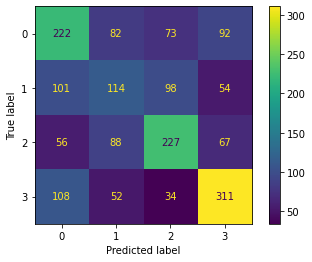

In [36]:
plot_confusion_matrix(Model, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


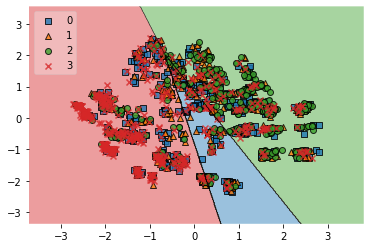

In [37]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model, legend=2)
plt.show()

## Random Forest

In [38]:
Model = RandomForestClassifier(n_estimators=500, max_depth=4)
Model.fit(X_Train, YTrain)
YNew = Model.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.4957841483979764


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


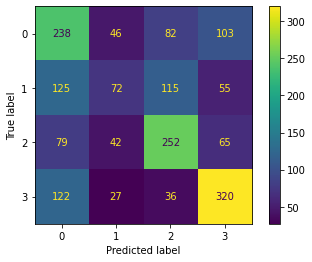

In [39]:
plot_confusion_matrix(Model, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


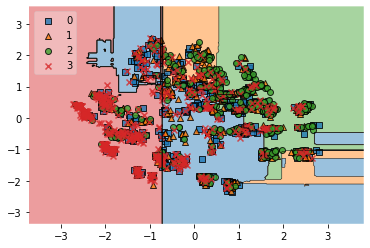

In [40]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model, legend=2)
plt.show()

## SVM

In [41]:
Model = SVC(kernel='rbf')
Model.fit(X_Train, YTrain)

SVC()

In [42]:
YNew = Model.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.47835862844294547


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


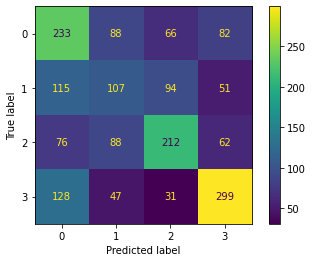

In [43]:
plot_confusion_matrix(Model, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


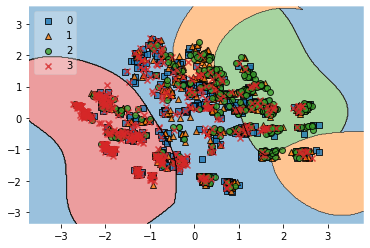

In [44]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model, legend=2)
plt.show()

## Decision Tree

In [45]:
Model = DecisionTreeClassifier(max_depth=4)
Model.fit(X_Train, YTrain)

DecisionTreeClassifier(max_depth=4)

In [46]:
YNew = Model.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.46037099494097805


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


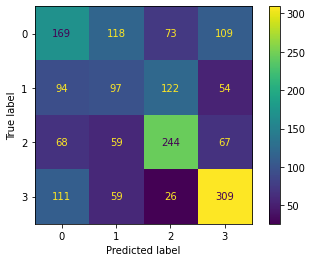

In [47]:
plot_confusion_matrix(Model, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


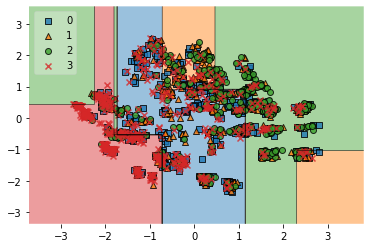

In [48]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model, legend=2)
plt.show()

## AdaBoost

In [90]:
Model1 = AdaBoostClassifier(base_estimator=LogisticRegression())
Model1.fit(X_Train, YTrain)
YNew = Model1.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.4856661045531197


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


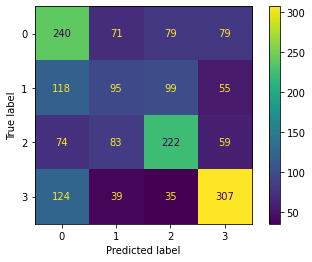

In [50]:
plot_confusion_matrix(Model1, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


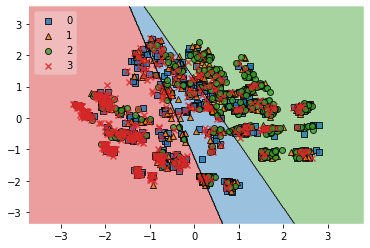

In [51]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model1.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model1, legend=2)
plt.show()

## LGB Classifier

In [91]:
from sklearn.linear_model import SGDClassifier
Model2 = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, objective='multiclass')
Model2.fit(X_Train, YTrain)
YNew = Model2.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.4659921304103429


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


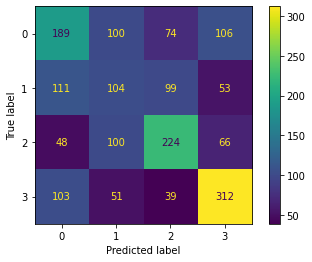

In [53]:
plot_confusion_matrix(Model2, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


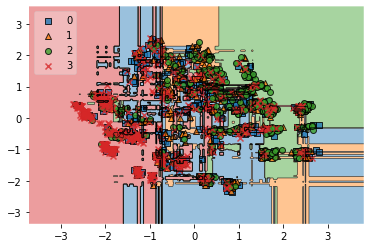

In [54]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model2.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model2, legend=2)
plt.show()

## XGB Classifier

In [92]:
Model3 = xg.XGBClassifier(learning_rate=0.1,n_estimators=500)
Model3.fit(X_Train, YTrain)
YNew = Model3.predict(X_Val)
print(accuracy_score(YVal, YNew))
print(YNew.shape)

0.44463181562675663
(1779,)


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


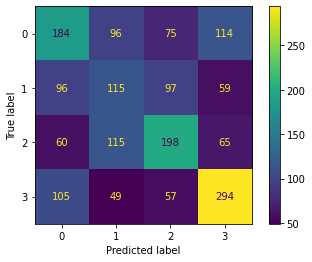

In [56]:
plot_confusion_matrix(Model3, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


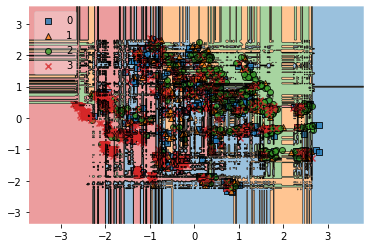

In [57]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model3.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model3, legend=2)
plt.show()

In [93]:
from sklearn.neighbors import KNeighborsClassifier
Model4= KNeighborsClassifier(n_neighbors=100)
Model4.fit(X_Train, YTrain)
YNew = Model4.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.4654300168634064


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


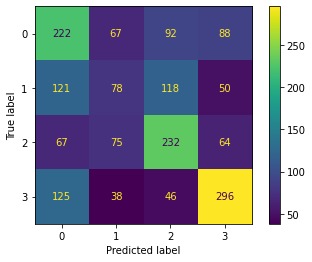

In [59]:
plot_confusion_matrix(Model4, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


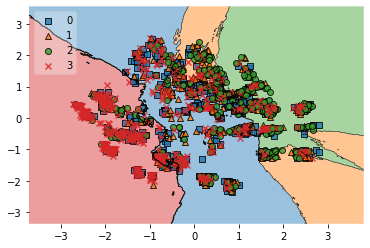

In [60]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model4.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model4, legend=2)
plt.show()

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG= GradientBoostingClassifier(n_estimators=98, learning_rate=0.1, random_state=1)
ModelG.fit(X_Train, YTrain)
YNew = ModelG.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.4873524451939292


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


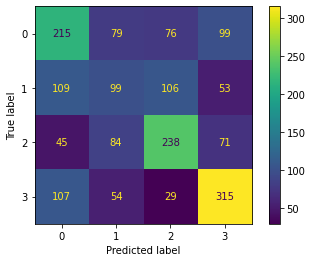

In [62]:
plot_confusion_matrix(ModelG, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


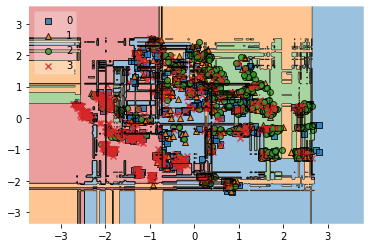

In [63]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
ModelG.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=ModelG, legend=2)
plt.show()

In [95]:
from sklearn.ensemble import HistGradientBoostingClassifier
Model6= HistGradientBoostingClassifier(loss='categorical_crossentropy', learning_rate=0.01, random_state=1)
Model6.fit(X_Train, YTrain)
YNew = Model6.predict(X_Val)
print(YNew.shape)
print(accuracy_score(YVal, YNew))

(1779,)
0.4822934232715008


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


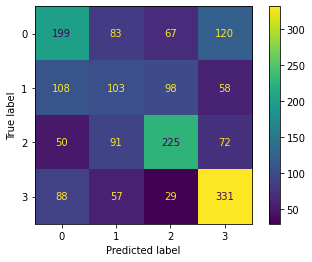

In [65]:
plot_confusion_matrix(Model6, X_Val, YVal)

C:\Users\salma\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:306: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs


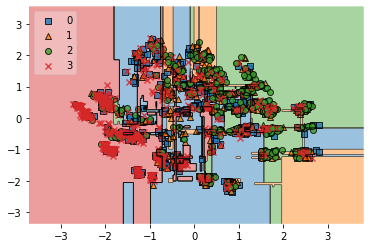

In [66]:
Y = np.array(YVal)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_Val)
Model6.fit(X_train2, Y)
plot_decision_regions(X_train2, Y, clf=Model6, legend=2)
plt.show()

In [ ]:
print(X_Train.shape)

In [87]:
level0 = []
level0.append(('LGBM',lgb.LGBMClassifier(n_estimators=60, learning_rate=0.01, objective='multiclass')))
level0.append(('HBC', HistGradientBoostingClassifier(loss='categorical_crossentropy', learning_rate=0.01, random_state=1)))
level0.append(('GBC', GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, random_state=1)))
level0.append(('xgboost', xg.XGBRFClassifier(learning_rate=0.001, n_estimators=250)))
level0.append(('catboost', CatBoostClassifier(iterations=870, learning_rate=0.01, verbose=0)))
Modol = CatBoostClassifier(iterations=870, learning_rate=0.01, verbose=0)
stacking = StackingClassifier(estimators=level0, final_estimator=Modol)
stacking.fit(X_Train, YTrain)
YNew = stacking.predict(X_Val)
print(accuracy_score(YVal, YNew))

0.5030916245081506


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
plot_confusion_matrix(stacking, X_Val, YVal)

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(stacking, XTrain, YTrain, cv=kfold, scoring='accuracy')
print(cv_results.mean())

In [98]:
from statistics import mode

pred1=Model1.predict(X_Val)
pred2=Model2.predict(X_Val)
pred3=ModelG.predict(X_Val)
pred4=Model5.predict(X_Val)
pred5=Model6.predict(X_Val)
pred5 = np.reshape(pred5, -1)
final_pred = np.array([])
for i in range(0,len(X_Val)):
    try:
        final_pred = np.append(final_pred, mode([pred1[i],pred2[i],pred3[i], pred4[i], pred5[i]]))
    except:
        final_pred = np.append(final_pred, [pred4[i]])

In [99]:
YNew = list(final_pred)
print(accuracy_score(YVal, YNew))

0.5030916245081506


In [ ]:
from statistics import mode

pred1=Model1.predict(XTest)
pred2=Model2.predict(XTest)
pred3=Model3.predict(XTest)
pred4=ModelG.predict(XTest)
pred5=Model5.predict(XTest)
pred5 = np.reshape(pred5, -1)
print(pred1.shape)
final_pred = np.array([])
for i in range(0,len(XTest)):
    try:
        final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
    except:
        final_pred = np.append(final_pred, [pred5[i]])

In [100]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('lr',LogisticRegression(multi_class='ovr')), ('sv', SVC(kernel='rbf')), ('rc', RandomForestClassifier(n_estimators=500, max_depth=4))], voting='hard')
model.fit(X_Train, YTrain)
#XVal = np.reshape(XVal,)
print(XVal.shape)
YNew = model.predict(X_Val)
print(accuracy_score(YVal, YNew))

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

(1779, 23)
0.4946599213041034


In [ ]:
YNew = Model4.predict(XTrain)
print(accuracy_score(YTrain, YNew))

In [ ]:

YTest = Model5.predict(X_Test)
print(YTest)
import math 
#YTest = list(final_pred)
print(type(YTest))

for i in range(len(YTest)):
   YTest[i] = YTest[[i]]

YTest = Encoder.inverse_transform(YTest)
print(YTest)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(YTrain, YNew))

In [ ]:
predictions=[]
for i in range(YTest.shape[0]):
    predictions.append(YTest[i])

In [ ]:
dict = {'ID':TestData['ID'],'Segmentation':predictions}
DF = pd.DataFrame.from_dict(dict)
DF.to_csv('Submissions_polycat.csv')